<h1> Christoffel Condition Numbers </h1>

In this notebook, we compare the condition numbers from Monte Carlo and Christoffel least squares.

In [1]:
from equadratures import *
import numpy as np
from matplotlib.ticker import FormatStrFormatter

In [4]:
# Condition numbers per loop
condition_number_Christoffel = []
condition_number_MC = []
condition_number_Randomized = []
condition_number_Effective = []

# Average condition numbers
average_condition_number_Christoffel = []
average_condition_number_MC = []
average_condition_number_Randomized = []
average_condition_number_Effective = []

oversampling_factor = 2.0
max_order = 26
dimensions = 2
order_values = np.arange(0, max_order, 1)
repetitions = 10
for k in range(0, max_order):
    for j in range(0, repetitions):
        x1 = Parameter(distribution='Uniform', order=k, lower=-1., upper=1.)
        basis = Basis('Total order')
        Christoffel = Polylsq([x1, x1], basis, mesh='chebyshev', optimization='none', oversampling=oversampling_factor)
        MonteCarlo = Polylsq([x1, x1], basis, mesh='random', optimization='none', oversampling=oversampling_factor)
        Randomized = Polylsq([x1, x1], basis, mesh='tensor', optimization='random', oversampling=oversampling_factor)
        Effective = Polylsq([x1, x1], basis, mesh='tensor', optimization='greedy-qr', oversampling=oversampling_factor)
        condition_number_Christoffel.append(np.linalg.cond(Christoffel.A))
        condition_number_MC.append(np.linalg.cond(MonteCarlo.A))
        condition_number_Randomized.append(np.linalg.cond(Randomized.Az))
        condition_number_Effective.append(np.linalg.cond(Effective.Az))
        del basis, Christoffel, MonteCarlo, Randomized, Effective, x1
    average_condition_number_Christoffel.append( np.average(condition_number_Christoffel) )
    average_condition_number_MC.append(np.average(condition_number_MC))
    average_condition_number_Randomized.append(np.average(condition_number_Randomized))
    average_condition_number_Effective.append(np.average(condition_number_Effective))
    condition_number_Christoffel = []
    condition_number_MC = []
    condition_number_Randomized = []
    condition_number_Effective = []

ValueError: Cannot take a larger sample than population when 'replace=False'

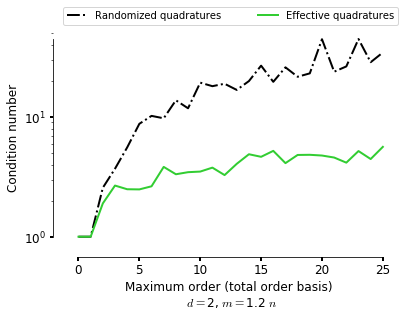

In [3]:
titlename = 'Maximum order (total order basis) \n $d=$%s, $m=$%s $n$'%(dimensions, oversampling_factor)
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
#plt.semilogy(order_values, average_condition_number_Christoffel, linestyle='-', linewidth=3, color='deepskyblue', label='Christoffel')
#plt.semilogy(order_values, average_condition_number_MC, linestyle='--', linewidth=3, color='orangered', label='Monte Carlo')
plt.semilogy(order_values, average_condition_number_Randomized, linestyle='-.', linewidth=2, color='black', label='Randomized quadratures')
plt.semilogy(order_values, average_condition_number_Effective, linestyle='-', linewidth=2, color='limegreen', label='Effective quadratures')
adjust_spines(ax, ['left', 'bottom'])
plt.xlabel(titlename, fontsize=12)
plt.ylabel('Condition number', fontsize=12)
ax.xaxis.set_major_formatter(FormatStrFormatter('%i'))
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,ncol=2, mode="expand", borderaxespad=0., fontsize=10)
plt.savefig('F2.eps', dpi=200,bbox_inches='tight', pad_inches=0.1)
plt.show()

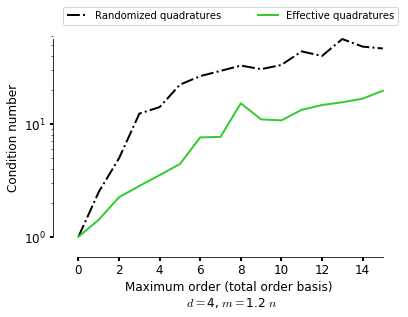

In [5]:
# Condition numbers per loop
condition_number_Christoffel = []
condition_number_MC = []
condition_number_Randomized = []
condition_number_Effective = []

# Average condition numbers
average_condition_number_Christoffel = []
average_condition_number_MC = []
average_condition_number_Randomized = []
average_condition_number_Effective = []

oversampling_factor = 1.2
max_order = 16
dimensions = 4
order_values = np.arange(0, max_order, 1)
repetitions = 10
for k in range(0, max_order):
    for j in range(0, repetitions):
        x1 = Parameter(distribution='Uniform', order=k, lower=-1., upper=1.)
        basis = Basis('Total order')
        Christoffel = Polylsq([x1, x1, x1], basis, mesh='chebyshev', optimization='none', oversampling=oversampling_factor)
        MonteCarlo = Polylsq([x1, x1, x1], basis, mesh='random', optimization='none', oversampling=oversampling_factor)
        Randomized = Polylsq([x1, x1, x1], basis, mesh='tensor', optimization='random', oversampling=oversampling_factor)
        Effective = Polylsq([x1, x1, x1], basis, mesh='tensor', optimization='greedy-qr', oversampling=oversampling_factor)
        condition_number_Christoffel.append(np.linalg.cond(Christoffel.A))
        condition_number_MC.append(np.linalg.cond(MonteCarlo.A))
        condition_number_Randomized.append(np.linalg.cond(Randomized.Az))
        condition_number_Effective.append(np.linalg.cond(Effective.Az))
        del basis, Christoffel, MonteCarlo, Randomized, Effective, x1
    average_condition_number_Christoffel.append( np.average(condition_number_Christoffel) )
    average_condition_number_MC.append(np.average(condition_number_MC))
    average_condition_number_Randomized.append(np.average(condition_number_Randomized))
    average_condition_number_Effective.append(np.average(condition_number_Effective))
    condition_number_Christoffel = []
    condition_number_MC = []
    condition_number_Randomized = []
    condition_number_Effective = []
titlename = 'Maximum order (total order basis) \n $d=$%s, $m=$%s $n$'%(dimensions, oversampling_factor)
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
#plt.semilogy(order_values, average_condition_number_Christoffel, linestyle='-', linewidth=3, color='deepskyblue', label='Christoffel')
#plt.semilogy(order_values, average_condition_number_MC, linestyle='--', linewidth=3, color='orangered', label='Monte Carlo')
plt.semilogy(order_values, average_condition_number_Randomized, linestyle='-.', linewidth=2, color='black', label='Randomized quadratures')
plt.semilogy(order_values, average_condition_number_Effective, linestyle='-', linewidth=2, color='limegreen', label='Effective quadratures')
adjust_spines(ax, ['left', 'bottom'])
plt.xlabel(titlename, fontsize=12)
plt.ylabel('Condition number', fontsize=12)
ax.xaxis.set_major_formatter(FormatStrFormatter('%i'))
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,ncol=2, mode="expand", borderaxespad=0., fontsize=10)
plt.savefig('F2.eps', dpi=200,bbox_inches='tight', pad_inches=0.1)
plt.show()

But even for a case with a low condition number, the matrix is not exactly close to the identity!

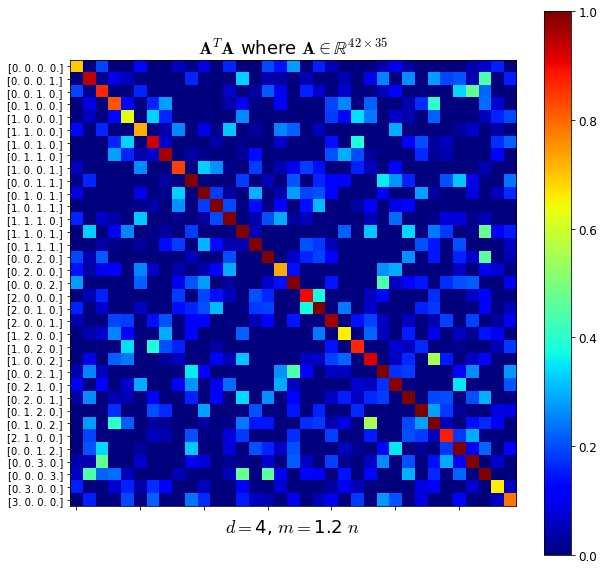

32.866303113848296


In [71]:
x1 = Parameter(distribution='Uniform', order=3, lower=-1., upper=1.)
basis = Basis('Total order')
dimensions = 4
Christoffel = Polylsq([x1, x1, x1, x1], basis, mesh='chebyshev', optimization='none', oversampling=oversampling_factor)
titlename = '$d=$%s, $m=$%s $n$'%(dimensions, oversampling_factor)
M = np.dot(Christoffel.A.T , Christoffel.A)
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1,1,1)
plt.imshow(M, interpolation='nearest', cmap=cm.jet, vmin=0., vmax=1.0)
plt.colorbar()
frame1 = plt.gca()
frame1.axes.xaxis.set_ticklabels([])
frame1.axes.yaxis.set_ticklabels([])
ticks = []
ticks2 = []
for i in range(0, basis.cardinality):
    ticks.append(str(basis.elements[i,:]))
plt.yticks(np.arange(basis.cardinality), ticks, fontsize=10)
mm, nn = Christoffel.Az.shape
titlestring = r'$\mathbf{A}^T \mathbf{A}$ where $\mathbf{A}\in \mathbb{R}^{%s \times %s}$'%(mm, nn)
plt.xlabel(titlename, fontsize=18)
plt.title(titlestring,fontsize=18)
plt.savefig('CS_Figure.eps', dpi=50)
plt.show()
print np.linalg.cond(Christoffel.A)   